In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import networkx
import random
graph = networkx.generators.lattice.triangular_lattice_graph(8,8)
to_remove = random.sample(list(graph.edges), 15)
graph.remove_edges_from(to_remove)
# make colony class

Run this next cell a couple of times if network looks bad

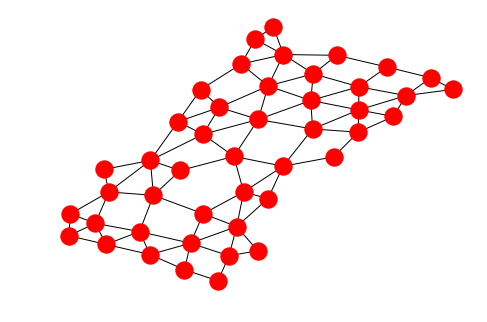

In [6]:
pos = networkx.spring_layout(graph)
networkx.draw(graph, pos)


Next we put things into our data structure

In [7]:
# Put the edges and nodes from networkx into the edge and node classes

import sys
sys.path.insert(0, '../cell_soap/')

from cell_describe import node, edge, cell

# nodes = [node([list(pos.values())[i][0], list(pos.values())[i][1]]) for i in range(len(pos.values()))]

a = {x:node([list(v)[0], list(v)[1]]) for (x,v) in list(pos.items())}
edges = [edge(a[v[0]], a[v[1]], None) for v in list(graph.edges)]
nodes = [a[x] for x,v in list(pos.items())]



Now that we have a list of nodes and edges, we can look for cells

In [8]:
# Perform cell finding code. Output is cells
#type specifies direction of cell finding. 0 for minimum positive angle and 1 for maximum negative angle
# both types are implemented
# num specifies the final node (node_b if we start from node_a)
from main import main

type = 0
num = 1
cells = []

for ed in edges:
    con_edges0 = ed.connected_edges[0]
    angles1 = [ed.edge_angle(e2)  for e2 in con_edges0]
    cells = main(ed, angles1, con_edges0, cells, type, num)
    type = 1
    cells = main(ed, angles1, con_edges0, cells, type, num)

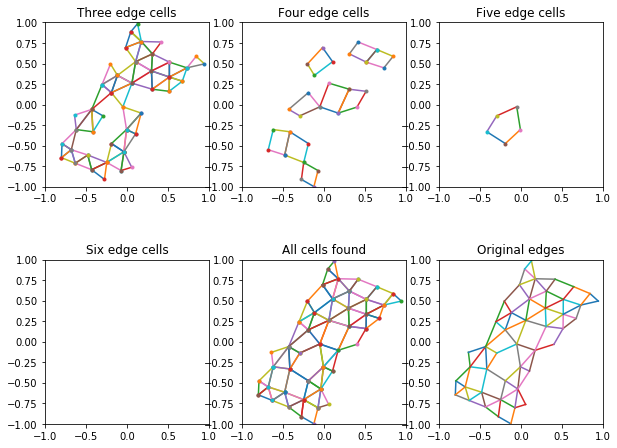

In [9]:
# plot all cells

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2,3,figsize=(10,8))
[cell.plot(axes[0, 0]) for cell in cells if len(cell.edges) == 3];
[cell.plot(axes[0, 1]) for cell in cells if len(cell.edges) == 4];
[cell.plot(axes[0,2]) for cell in cells if len(cell.edges) == 5];
[cell.plot(axes[1,0]) for cell in cells if len(cell.edges) == 6];
[cell.plot(axes[1,1]) for cell in cells if len(cell.edges) == 5];
[cell.plot(axes[1,1]) for cell in cells if len(cell.edges) == 4];
[cell.plot(axes[1,1]) for cell in cells if len(cell.edges) == 3];
[cell.plot(axes[1,1]) for cell in cells if len(cell.edges) == 6];
[cell.plot(axes[1,1]) for cell in cells if len(cell.edges) == 7];
#[cell.plot(axes[2,1]) for cell in cell_seven];
[ed.plot(axes[1,2]) for ed in edges];

[a.set(xlim=(-1,1), ylim=(-1, 1), aspect=1) for a in axes[1,:]]
[a.set(xlim=(-1,1), ylim=(-1, 1), aspect=1) for a in axes[0,:]]
#[a.set(xlim=(-1,1), ylim=(-1, 1), aspect=1) for a in axes[2,:]]
axes[1,2].set_title("Original edges")
axes[0,0].set_title("Three edge cells")
axes[0,1].set_title("Four edge cells")
axes[0,2].set_title("Five edge cells")
axes[1,0].set_title("Six edge cells")
#axes[2,1].set_title("Seven edge cells")
axes[1,1].set_title("All cells found")
plt.show()

Now we sort cells that we want into the colony class and calculate tensions

In [10]:
# Calculate tension

from cell_describe import colony

col1 = colony(cells)
tensions = col1.calculate_tension()


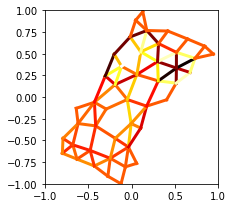

In [11]:
# plot tensions

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.colors import Normalize


edges2 = col1.edges
nodes2 = col1.nodes
fig, ax = plt.subplots(1,1,figsize=(5,3))

min_t = min(tensions)
max_t = max(tensions)
avg_t = (max_t + min_t)/2
width = max_t - min_t
colors = (tensions - avg_t)/width
def norm(tensions):
    return (tensions - min_t) / float(max_t - min_t)
new = norm(tensions)

for j, an_edge in enumerate(edges2):
    #color = plt.cm.YlOrBr(norm(tensions))
   # an_edge.plot(ax, c=cm.hot(colors[j]), lw = 3)
    an_edge.plot(ax, c = cm.hot(new[j]), lw = 3)

ax.set(xlim=[-1,1], ylim=[-1, 1], aspect = 1)
plt.tight_layout()

Testing